In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv("house train.csv")
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


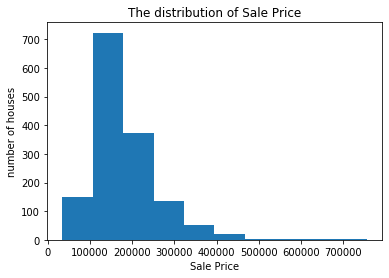

In [3]:
plt.hist(house.SalePrice)
plt.title("The distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("number of houses")
plt.show()

In [4]:
house.corr().tail(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.057044,0.008283,0.206167,0.077672,0.065166,-0.001985,0.004950,0.005829,0.011723,0.140491,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.006242,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021172,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.000712,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [5]:
house["OverallQual"].isnull().values.any()

False

In [6]:
house["YearBuilt"].isnull().values.any()

False

In [7]:
# Y is the target variable
Y = house['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = house[['OverallQual','YearBuilt']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [42003.73725609   274.59139024]

Intercept: 
 -616565.9996745326


In [9]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1256.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):          7.52e-318
Time:                        10:34:39   Log-Likelihood:                -17812.
No. Observations:                1460   AIC:                         3.563e+04
Df Residuals:                    1457   BIC:                         3.565e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.166e+05   9.66e+04     -6.380      0.000   -8.06e+05   -4.27e+05
OverallQual    4.2e+04   1111.777     37.781      0.000    3.98e+04    4.42e+04
YearBuilt     274.5914     50.908      5.394      0.000     174.730     374.453
==============================================================================
Omnibus:                      649.933   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7045.246
Skew:                           1.780   Prob(JB):                         0.00
Kurtosis:                      13.156   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# So after estimating the parameters using OLS, we can state our model like that:
# SalePrice=-616565+(42003*OverallQual)+(274*YearBuilt)


Coefficients: 
 [42003.   274.]

Intercept: 
 -616565.0000000002


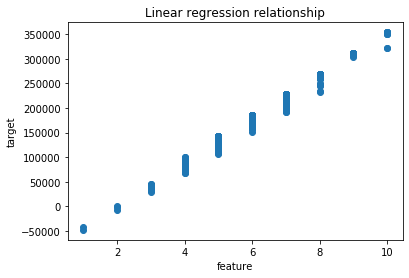

In [9]:
# this is our equation: SalePrice=-616565+(42003*OverallQual)+(274*YearBuilt)
house["SalePrice"] = -616565+(42003*house["OverallQual"])+(274*house["YearBuilt"])
# we fit a linear regression where target is SalePrice
# and features are "OverallQual","YearBuilt"
lrm_example = linear_model.LinearRegression()
lrm_example.fit(house[["OverallQual","YearBuilt"]],house["SalePrice"])
# predictions of the linear regression
predictions = lrm_example.predict(house[["OverallQual","YearBuilt"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated temperature and X values
plt.scatter(house["OverallQual"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression relationship')
plt.show()

In [10]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the house model is: {}".format(np.mean(errors)))

Mean of the errors in the house model is: -1169.2856164383072


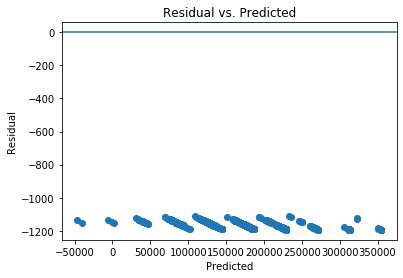

In [11]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [12]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 21717.5 and p value is 0
Levene test statistic value is 2600.26 and p value is 0


In [22]:
house[["SalePrice","OverallQual","YearBuilt"]].corr()

,SalePrice,OverallQual,YearBuilt
SalePrice,1.000000,0.994217,0.657077
OverallQual,0.994217,1.000000,0.572323
YearBuilt,0.657077,0.572323,1.000000


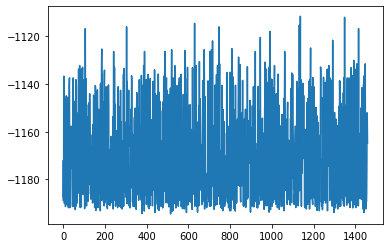

In [15]:
plt.plot(errors)
plt.show()

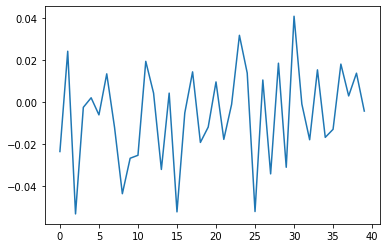

In [16]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

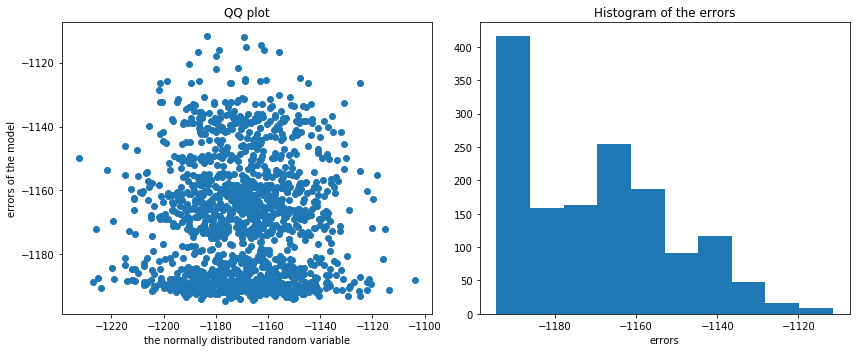

In [17]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [19]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 91.67953955380823 and p value is 0.0
Normality test statistics is 102.68983824100923 and p value is 5.025565668013254e-23


In [ ]:
# We have built a regression model where the target variable is SalePrice. 
# And we used "OverallQual","YearBuilt" as explanatory variables. Estimation of the model using OLS is above.
# After that we checked if our model meets the Gauss-Markov Conditions.
# Assumption one: there is not linearity of the model in the coefficients
# Assumption two: the expected value of the error is different than zero, so our model is biased.¶
# Assumption three: The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis
#                   which means our errors are heteroscedastic.¶
# Assumption four: when we examine correlation matrix we see high multicollinearity¶
# Assumption five: the autocorrelation between the errors of our model is indeed very low (ranging between -0.04 and 0.04).¶
# Assumption six: As can be seen in the charts above, our errors are not normally distributed. If they were, we would see a straight line
#                 going from the bottom-left to the upper-right of the QQ plot and a scattered plot shape in the histogram.¶